In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [2]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_16_data_4.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_16_data_4.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

read_x_data
read_y_data
[[-0.97820564  0.29297193 -0.07061703 -0.96544182  0.2754832  -0.07559271
  -0.95055615  0.26713403 -0.06478687 -0.94939434  0.28851273 -0.05467842
  -1.02291172  0.31880814 -0.06668594 -1.02036267  0.29820167 -0.09116619
  -0.98972578  0.26476729 -0.09036746 -0.9837491   0.30531915 -0.07307987
  -1.06898421  0.34968716 -0.03087716 -1.12097493  0.35989869 -0.06120685
  -1.15727766  0.31518646 -0.15790448 -1.05000599  0.3741363  -0.18206539
  -0.59768246  0.20031284 -0.03087716 -0.54569173  0.19010131 -0.06120685
  -0.50938901  0.23481354 -0.15790448 -0.61666068  0.1758637  -0.18206539]
 [-0.96599853  0.27606791 -0.07565659 -0.95086392  0.26695474 -0.06533805
  -0.94930712  0.28749528 -0.05464469 -0.94653851  0.31281185 -0.06572685
  -1.02090166  0.29927989 -0.09043877 -0.99077126  0.26520123 -0.09134644
  -0.98375094  0.30325434 -0.07242409 -0.95978485  0.33228947 -0.10427239
  -1.11885836  0.35967639 -0.059538   -1.15987075  0.32063895 -0.15402077
  -1.05699218

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

(3072, 48) (3072, 7) training data size
(1024, 48) (1024, 7) Validation data size


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm


input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()
with open('modelsummary_4p.txt', 'w') as f:

    model.summary(print_fn=lambda x: f.write(x + '\n'))

Model: "Rectangular_4by4_sensor_concept_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48)]              0         
_________________________________________________________________
dense (Dense)                (None, 700)               34300     
_________________________________________________________________
dense_1 (Dense)              (None, 700)               490700    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 4907      
Total params: 529,907
Trainable params: 529,907
Non-trainable params: 0
_________________________________________________________________


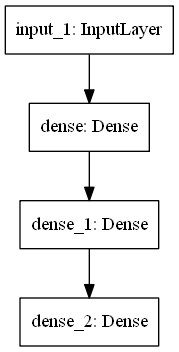

In [5]:
from keras.utils import plot_model
keras.utils.plot_model(model)

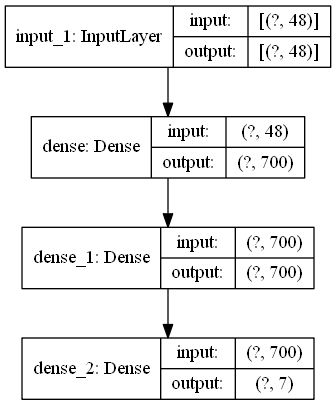

In [6]:
keras.utils.plot_model(model, "Rectangle_16_4p_model_architecture.png", show_shapes=True)

In [7]:
history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))
#history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=1, callbacks=my_callbacks, validation_data=(xval_scale,yval_scale))


Epoch 1/20
96/96 - 1s - loss: 0.2450 - val_loss: 0.2092
Epoch 2/20
96/96 - 1s - loss: 0.1931 - val_loss: 0.1994
Epoch 3/20
96/96 - 1s - loss: 0.1724 - val_loss: 0.1659
Epoch 4/20
96/96 - 1s - loss: 0.1621 - val_loss: 0.1560
Epoch 5/20
96/96 - 1s - loss: 0.1521 - val_loss: 0.1466
Epoch 6/20
96/96 - 1s - loss: 0.1409 - val_loss: 0.1410
Epoch 7/20
96/96 - 1s - loss: 0.1395 - val_loss: 0.1379
Epoch 8/20
96/96 - 1s - loss: 0.1307 - val_loss: 0.1297
Epoch 9/20
96/96 - 1s - loss: 0.1279 - val_loss: 0.1369
Epoch 10/20
96/96 - 1s - loss: 0.1223 - val_loss: 0.1340
Epoch 11/20
96/96 - 1s - loss: 0.1208 - val_loss: 0.1297
Epoch 12/20
96/96 - 1s - loss: 0.1162 - val_loss: 0.1139
Epoch 13/20
96/96 - 1s - loss: 0.1127 - val_loss: 0.1180
Epoch 14/20
96/96 - 1s - loss: 0.1107 - val_loss: 0.1115
Epoch 15/20
96/96 - 1s - loss: 0.1102 - val_loss: 0.1211
Epoch 16/20
96/96 - 1s - loss: 0.1073 - val_loss: 0.1139
Epoch 17/20
96/96 - 1s - loss: 0.1031 - val_loss: 0.1030
Epoch 18/20
96/96 - 1s - loss: 0.1018 - 

In [8]:
#to evaluate on training data
#scores=model.evaluate(xtrain_scale,y_train_scale,verbose=0)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#model.save("model.h5")
#print("saved the model to disk")
#to load model
#model=load_model('model.h5')

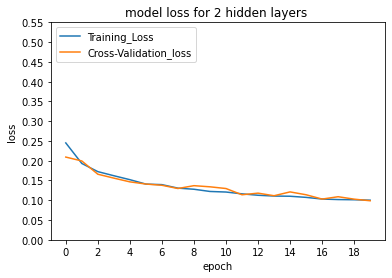

In [9]:
import keras
from matplotlib import pyplot as plt
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss for 2 hidden layers ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Loss ', 'Cross-Validation_loss'], loc='upper left')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 19, 2))
plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('performance_for_2_hiddenlayers_4p.png', dpi=1200)
plt.show()


In [10]:
###for 3 hidden layers
input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
hidden_layer_3 = Dense(units = 700, activation = 'relu')(hidden_layer_2)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_3)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")




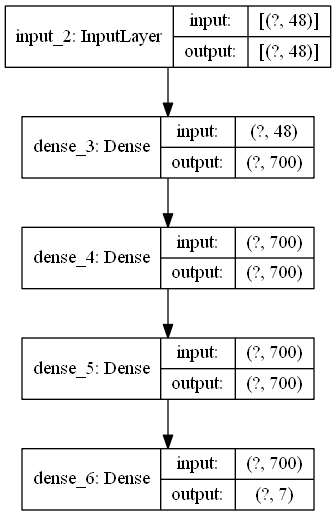

In [11]:
keras.utils.plot_model(model, "Rectangle_16_4p_model_architecture_for3hiddenlayers.png", show_shapes=True)

In [12]:
history_2 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))

Epoch 1/20
96/96 - 2s - loss: 0.2482 - val_loss: 0.2054
Epoch 2/20
96/96 - 1s - loss: 0.1847 - val_loss: 0.1688
Epoch 3/20
96/96 - 1s - loss: 0.1633 - val_loss: 0.1546
Epoch 4/20
96/96 - 1s - loss: 0.1504 - val_loss: 0.1563
Epoch 5/20
96/96 - 1s - loss: 0.1425 - val_loss: 0.1318
Epoch 6/20
96/96 - 1s - loss: 0.1282 - val_loss: 0.1331
Epoch 7/20
96/96 - 1s - loss: 0.1265 - val_loss: 0.1326
Epoch 8/20
96/96 - 1s - loss: 0.1198 - val_loss: 0.1181
Epoch 9/20
96/96 - 1s - loss: 0.1112 - val_loss: 0.1093
Epoch 10/20
96/96 - 1s - loss: 0.1063 - val_loss: 0.1151
Epoch 11/20
96/96 - 1s - loss: 0.1058 - val_loss: 0.1192
Epoch 12/20
96/96 - 1s - loss: 0.1060 - val_loss: 0.1076
Epoch 13/20
96/96 - 1s - loss: 0.0993 - val_loss: 0.1104
Epoch 14/20
96/96 - 1s - loss: 0.1012 - val_loss: 0.1057
Epoch 15/20
96/96 - 1s - loss: 0.0952 - val_loss: 0.0943
Epoch 16/20
96/96 - 1s - loss: 0.0930 - val_loss: 0.1094
Epoch 17/20
96/96 - 1s - loss: 0.0931 - val_loss: 0.0969
Epoch 18/20
96/96 - 1s - loss: 0.0892 - 

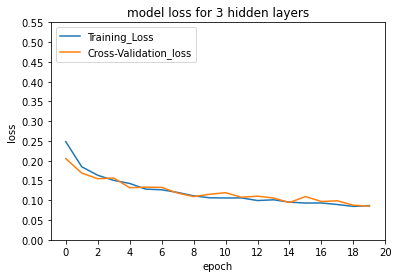

In [13]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss for 3 hidden layers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Loss ', 'Cross-Validation_loss'], loc='upper left')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('performance_for_3_hiddenlayers_4p.png', dpi=1200)
plt.show()

In [14]:
###for 4 hidden layers
input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
hidden_layer_3 = Dense(units = 700, activation = 'relu')(hidden_layer_2)
hidden_layer_4 = Dense(units = 700, activation = 'relu')(hidden_layer_3)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_4)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")



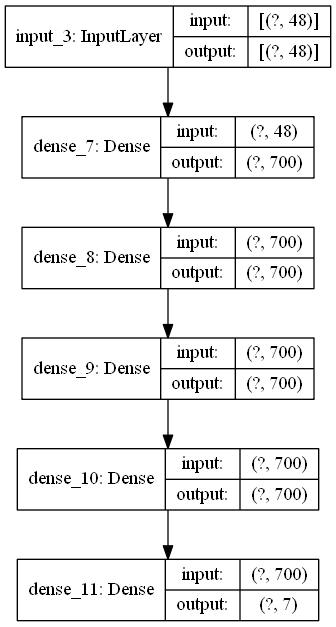

In [15]:
keras.utils.plot_model(model, "Rectangle_16_4p_model_architecture_for4hiddenlayers.png", show_shapes=True)

In [16]:
history_3 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))

Epoch 1/20
96/96 - 2s - loss: 0.2614 - val_loss: 0.2187
Epoch 2/20
96/96 - 2s - loss: 0.1877 - val_loss: 0.1651
Epoch 3/20
96/96 - 2s - loss: 0.1584 - val_loss: 0.1539
Epoch 4/20
96/96 - 2s - loss: 0.1481 - val_loss: 0.1455
Epoch 5/20
96/96 - 2s - loss: 0.1338 - val_loss: 0.1454
Epoch 6/20
96/96 - 2s - loss: 0.1249 - val_loss: 0.1267
Epoch 7/20
96/96 - 2s - loss: 0.1232 - val_loss: 0.1185
Epoch 8/20
96/96 - 2s - loss: 0.1110 - val_loss: 0.1153
Epoch 9/20
96/96 - 2s - loss: 0.1078 - val_loss: 0.1069
Epoch 10/20
96/96 - 2s - loss: 0.1068 - val_loss: 0.1119
Epoch 11/20
96/96 - 2s - loss: 0.1039 - val_loss: 0.1109
Epoch 12/20
96/96 - 2s - loss: 0.1052 - val_loss: 0.1229
Epoch 13/20
96/96 - 2s - loss: 0.0963 - val_loss: 0.1005
Epoch 14/20
96/96 - 2s - loss: 0.0896 - val_loss: 0.0938
Epoch 15/20
96/96 - 2s - loss: 0.0888 - val_loss: 0.0977
Epoch 16/20
96/96 - 2s - loss: 0.0910 - val_loss: 0.0868
Epoch 17/20
96/96 - 2s - loss: 0.0851 - val_loss: 0.0987
Epoch 18/20
96/96 - 2s - loss: 0.0891 - 

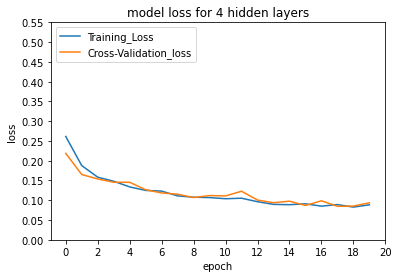

In [17]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss for 4 hidden layers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Loss ', 'Cross-Validation_loss'], loc='upper left')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('performance_for_4_hiddenlayers_4p.png', dpi=1200)
plt.show()

In [18]:
###for 5 hidden layers
input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
hidden_layer_3 = Dense(units = 700, activation = 'relu')(hidden_layer_2)
hidden_layer_4 = Dense(units = 700, activation = 'relu')(hidden_layer_3)
hidden_layer_5 = Dense(units = 700, activation = 'relu')(hidden_layer_4)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_5)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")


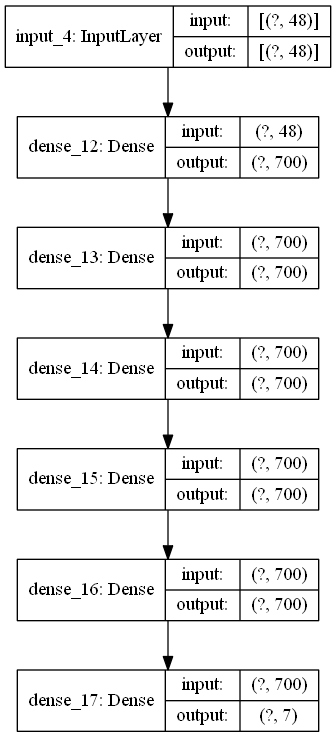

In [19]:
keras.utils.plot_model(model, "Rectangle_16_4p_model_architecture_for5hiddenlayers.png", show_shapes=True)

In [20]:
history_4 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))

Epoch 1/20
96/96 - 3s - loss: 0.2583 - val_loss: 0.2114
Epoch 2/20
96/96 - 2s - loss: 0.1919 - val_loss: 0.1799
Epoch 3/20
96/96 - 3s - loss: 0.1674 - val_loss: 0.1557
Epoch 4/20
96/96 - 3s - loss: 0.1454 - val_loss: 0.1326
Epoch 5/20
96/96 - 3s - loss: 0.1393 - val_loss: 0.1418
Epoch 6/20
96/96 - 3s - loss: 0.1355 - val_loss: 0.1338
Epoch 7/20
96/96 - 2s - loss: 0.1218 - val_loss: 0.1183
Epoch 8/20
96/96 - 2s - loss: 0.1179 - val_loss: 0.1152
Epoch 9/20
96/96 - 2s - loss: 0.1122 - val_loss: 0.1075
Epoch 10/20
96/96 - 3s - loss: 0.1156 - val_loss: 0.1190
Epoch 11/20
96/96 - 3s - loss: 0.1061 - val_loss: 0.1034
Epoch 12/20
96/96 - 3s - loss: 0.1033 - val_loss: 0.1108
Epoch 13/20
96/96 - 3s - loss: 0.1005 - val_loss: 0.1110
Epoch 14/20
96/96 - 2s - loss: 0.0948 - val_loss: 0.1031
Epoch 15/20
96/96 - 3s - loss: 0.0965 - val_loss: 0.0960
Epoch 16/20
96/96 - 3s - loss: 0.0929 - val_loss: 0.0921
Epoch 17/20
96/96 - 3s - loss: 0.0939 - val_loss: 0.0909
Epoch 18/20
96/96 - 3s - loss: 0.0887 - 

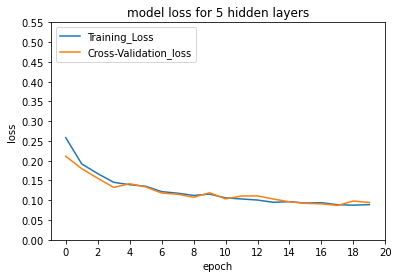

In [21]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss for 5 hidden layers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Loss ', 'Cross-Validation_loss'], loc='upper left')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('performance_for_5_hiddenlayers_4p.png', dpi=1200)
plt.show()